[Oregon Curriculum Network](http://www.4dsolutions.net/ocn) <br />
[Discovering Math with Python](Introduction.ipynb)


## LAB:  Sieve of Eratosthenes
<div>
<br />
</div>
<div style="text-align: center;">
<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/23595014708/in/dateposted-public/" title="Sieve of Eratosthenes"><img src="https://farm5.staticflickr.com/4472/23595014708_9f47f9f0c7.jpg" width="462" height="500" alt="Sieve of Eratosthenes"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>


The end goal is to verify the included program is getting all the primes it should be.  

To this end, primes_file.txt contains the first 10,000 prime numbers, up to over 104,000.

First, lets see how we read in the file and turn it into a simple Python list, of primes only. This published list came from [The Prime Pages](http://primes.utm.edu/).

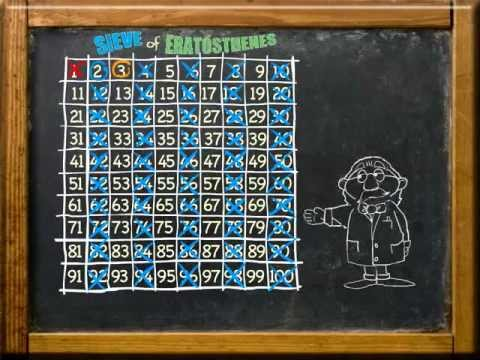

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('V08g_lkKj6Q')

In [2]:
with open("primes_file.txt", "r") as primes:
    output = []
    for line in primes.readlines()[3:]: # skip first 4 lines
        if line.strip() == 'end.':
            break
        for column in line.split():
            num = int(column.strip())
            output.append(num)    

*output* will be global since the above cell is run top level, not inside the scope of a function.  Checking the last few entries below, to confirm everything worked:

In [3]:
# verify we have the data we want
print(output[0:10]) # first 10
print(output[-10: -1]) # last 10

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
[104677, 104681, 104683, 104693, 104701, 104707, 104711, 104717, 104723]


So far I'm feeling pretty good about this one.  

Lets check on primes to 1000.  Up to 100,000 is left as an exercise to the more committed.

In [4]:
from math import sqrt as root2, floor

def eratosthenes(n):
    the_max = floor(root2(n)) # upper limit of eliminator
    sieve = list(range(0, n+1))
    eliminator = 2
    while True:
        if eliminator > the_max:
            break
        print("Eliminating multiples of:", eliminator)
        for k in range(2 * eliminator, n + 1, eliminator):
            sieve[k] = 0
        while sieve[eliminator + 1] == 0:
            eliminator += 1
        else:
            eliminator = sieve[eliminator + 1]
        
    # shrink me down (compact the sieve)    
    sieve = [n for n in sieve if n != 0][1:]  # list comprehension!
    return sieve

# apply fancy formatting to output
output = eratosthenes(1000)
for row in range(0, len(output), 10):
    print(", ".join(map(lambda s: str.format("{:3d}", s), output[row:row+10])))

Eliminating multiples of: 2
Eliminating multiples of: 3
Eliminating multiples of: 5
Eliminating multiples of: 7
Eliminating multiples of: 11
Eliminating multiples of: 13
Eliminating multiples of: 17
Eliminating multiples of: 19
Eliminating multiples of: 23
Eliminating multiples of: 29
Eliminating multiples of: 31
  2,   3,   5,   7,  11,  13,  17,  19,  23,  29
 31,  37,  41,  43,  47,  53,  59,  61,  67,  71
 73,  79,  83,  89,  97, 101, 103, 107, 109, 113
127, 131, 137, 139, 149, 151, 157, 163, 167, 173
179, 181, 191, 193, 197, 199, 211, 223, 227, 229
233, 239, 241, 251, 257, 263, 269, 271, 277, 281
283, 293, 307, 311, 313, 317, 331, 337, 347, 349
353, 359, 367, 373, 379, 383, 389, 397, 401, 409
419, 421, 431, 433, 439, 443, 449, 457, 461, 463
467, 479, 487, 491, 499, 503, 509, 521, 523, 541
547, 557, 563, 569, 571, 577, 587, 593, 599, 601
607, 613, 617, 619, 631, 641, 643, 647, 653, 659
661, 673, 677, 683, 691, 701, 709, 719, 727, 733
739, 743, 751, 757, 761, 769, 773, 787, 797, 809

Now we're interested in checking our list against the elements obtained from primes_file.txt, up to and including our largest prime.  

We may simply count the primes we have, chop off that many from *output* and perform and equality test...

In [5]:
how_many = len(output)
check_list = output[:how_many]  # get as many from the published pool as are in the sieve
print(output == check_list)     # check for equality

True


Below is a screen shot of what the sieve algorithm looks like on the Codesters development platform, used with 5th and 6th graders in some schools.  You may actually run the code in Codesters by visiting [this link](https://www.codesters.com/preview/efa131bd8f0b43d0a25e22f37c729c9b/).

<div>
<br />
</div>

<div style="text-align: center;">
<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/36783001573/in/dateposted-public/" title="Codesters | Sieve of Erastosthenes"><img src="https://farm5.staticflickr.com/4468/36783001573_2313c48b31.jpg" width="500" height="303" alt="Codesters | Sieve of Erastosthenes"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
</div>